In [260]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import joblib

In [261]:

# Charger le fichier CSV
X_full = pd.read_csv('data/train.csv')

# Séparer les variables d'entrée (features) et la cible
x_train = X_full.drop(columns=['SalePrice'])
y_train = X_full['SalePrice']

# Identifier les colonnes catégorielles
cat_columns = x_train.select_dtypes(include=['object']).columns
num_columns = x_train.select_dtypes(include=['number']).columns

# Calculer le pourcentage de valeurs manquantes pour chaque colonne
missing_percentage = x_train.isnull().mean() * 100

# Sélectionner les colonnes avec plus de 65% de valeurs manquantes et les supprimer
columns_to_drop = missing_percentage[missing_percentage > 65].index
x_train_encoded = x_train.drop(columns=columns_to_drop)


# Remplacer les valeurs manquantes :
# - Par la médiane pour les colonnes numériques
num_imputer = SimpleImputer(strategy='median')
x_train[num_columns] = num_imputer.fit_transform(x_train[num_columns])

# - Par la valeur la plus fréquente pour les colonnes catégorielles
cat_imputer = SimpleImputer(strategy='most_frequent')
x_train[cat_columns] = cat_imputer.fit_transform(x_train[cat_columns])


# Appliquer get_dummies() sur les colonnes catégorielles
x_train_encoded = pd.get_dummies(x_train, columns=cat_columns, drop_first=True)


# Afficher les premières lignes du DataFrame transformé
print("\nDataFrame après remplacement des valeurs manquantes et encodage des variables catégorielles :")
x_train_encoded.head()
x_train_encoded.to_csv('data/train_encoded.csv', index=False)




DataFrame après remplacement des valeurs manquantes et encodage des variables catégorielles :


RMSE (Racine de l'erreur quadratique) sur les données d'entraînement : 20697.335148267714
R² Score sur les données d'entraînement : 0.9320764163183072


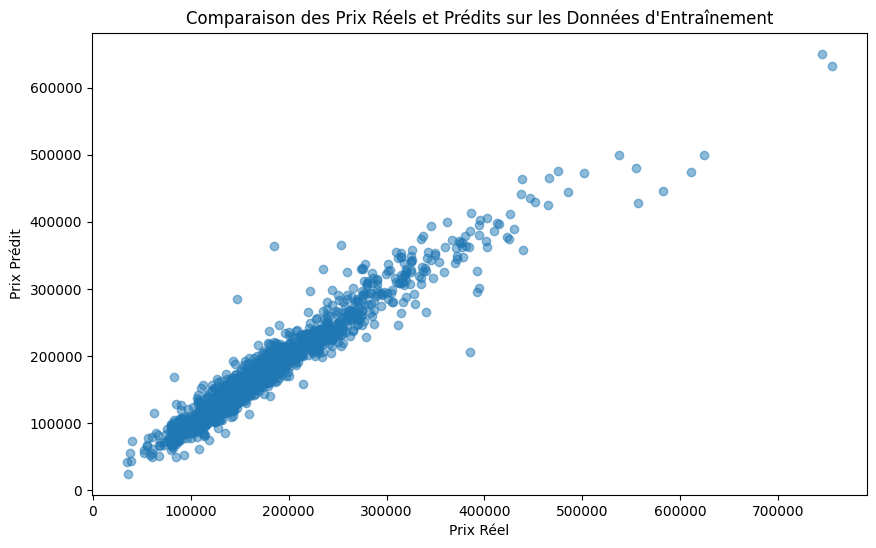

['model_trained.pkl']

In [262]:

# Entraîner le modèle avec les données d'entraînement
trained_model = LinearRegression()
trained_model.fit(x_train_encoded, y_train)

# Faire des prédictions avec le modèle sur les données d'entraînement
y_train_pred = trained_model.predict(x_train_encoded)

# Affichage des résultats
print("RMSE (Racine de l'erreur quadratique) sur les données d'entraînement :", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("R² Score sur les données d'entraînement :", r2_score(y_train, y_train_pred))

# Affichage du scatter plot pour visualiser la performance sur les données d'entraînement
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred, alpha=0.5)
plt.xlabel("Prix Réel")
plt.ylabel("Prix Prédit")
plt.title("Comparaison des Prix Réels et Prédits sur les Données d'Entraînement")
plt.show()

# Sauvegarder le modèle (si nécessaire)
joblib.dump(trained_model, 'model_trained.pkl')  # Sauvegarder le modèle pour l'utiliser plus tard



Les 20 variables les plus influentes :
             Variable    Coefficient
112  RoofMatl_Membran  759474.560547
113    RoofMatl_Metal  730520.211405
117  RoofMatl_WdShngl  720944.909916
115  RoofMatl_Tar&Grv  666927.972135
111  RoofMatl_CompShg  664120.567427
116  RoofMatl_WdShake  656725.935146
114     RoofMatl_Roll  650846.532126
91    Condition2_PosN -239713.201919
216     GarageQual_Po -141514.753766
214     GarageQual_Fa -127448.099367
215     GarageQual_Gd -121135.727590
217     GarageQual_TA -120668.877048
219     GarageCond_Gd  118228.553566
220     GarageCond_Po  116608.706556
221     GarageCond_TA  116468.056381
218     GarageCond_Fa  113585.443603
92    Condition2_RRAe -109156.661291
110    RoofStyle_Shed   96926.494278
224         PoolQC_Fa  -90543.165576
165       BsmtCond_Po   72347.088114


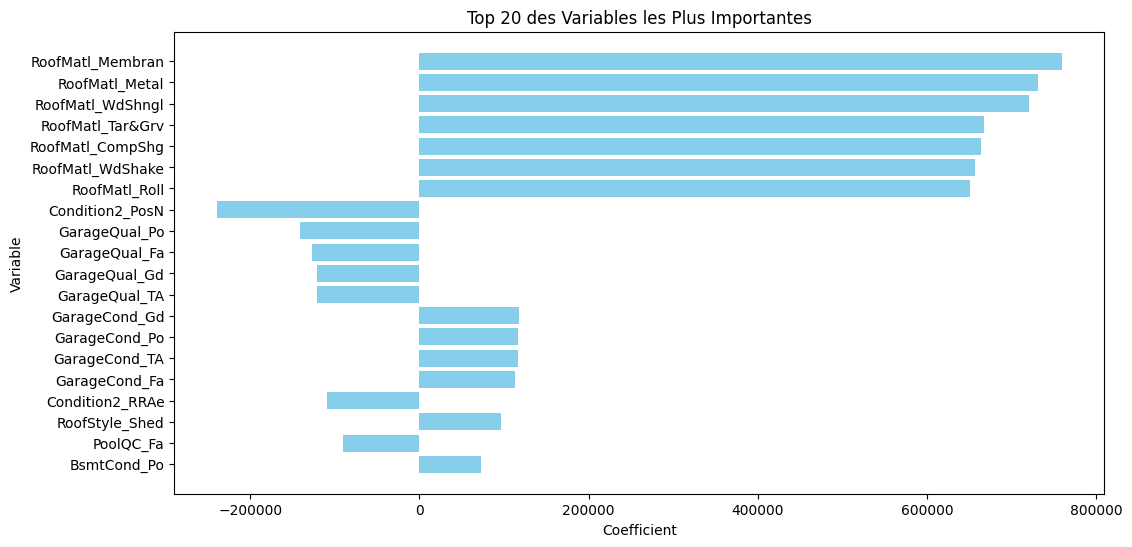

In [263]:
coefficients_df = pd.DataFrame({
    'Variable': x_train_encoded.columns,
    'Coefficient': trained_model.coef_
})

# Trier par importance absolue des coefficients (impact sur la prédiction)
coefficients_df['Abs_Coefficient'] = np.abs(coefficients_df['Coefficient'])
coefficients_df = coefficients_df.sort_values(by='Abs_Coefficient', ascending=False)

# Afficher les 20 variables les plus influentes
print("\nLes 20 variables les plus influentes :")
print(coefficients_df[['Variable', 'Coefficient']].head(20))

# Tracer les 20 variables les plus influentes sous forme de graphique
plt.figure(figsize=(12, 6))
plt.barh(coefficients_df['Variable'][:20], coefficients_df['Coefficient'][:20], color='skyblue')
plt.xlabel("Coefficient")
plt.ylabel("Variable")
plt.title("Top 20 des Variables les Plus Importantes")
plt.gca().invert_yaxis()  # Inverser l'axe Y pour un meilleur affichage
plt.show()

RMSE (Racine de l'erreur quadratique) sur les données d'entraînement : 35992.36967825574
R² Score sur les données d'entraînement : 0.7945942443566982


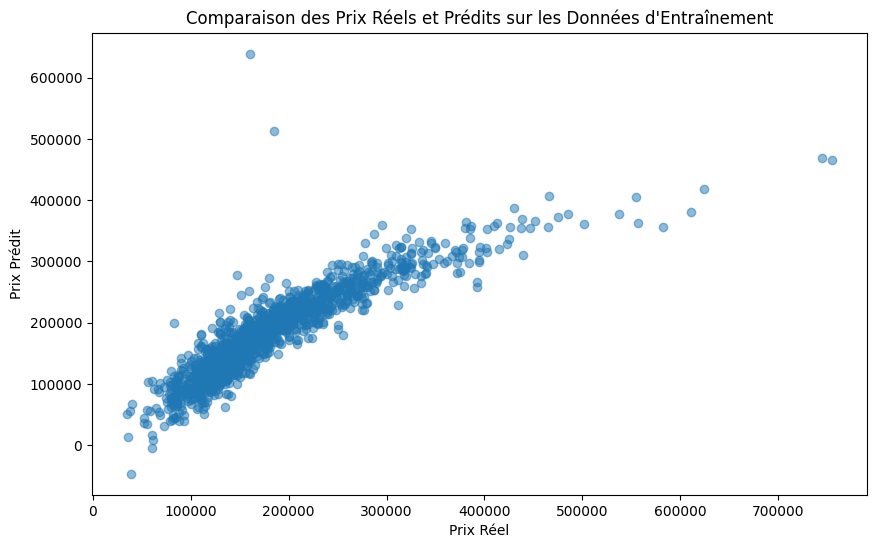

In [264]:

x_train_encoded_inside = x_train_encoded[['OverallQual', 'OverallCond',  'TotalBsmtSF',  '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'MiscVal']]

# Entraîner le modèle avec les données d'entraînement
model = LinearRegression()
model.fit(x_train_encoded_inside, y_train)

# Faire des prédictions avec le modèle sur les données d'entraînement
y_train_pred = model.predict(x_train_encoded_inside)

# Affichage des résultats
print("RMSE (Racine de l'erreur quadratique) sur les données d'entraînement :", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("R² Score sur les données d'entraînement :", r2_score(y_train, y_train_pred))

# Affichage du scatter plot pour visualiser la performance sur les données d'entraînement
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred, alpha=0.5)
plt.xlabel("Prix Réel")
plt.ylabel("Prix Prédit")
plt.title("Comparaison des Prix Réels et Prédits sur les Données d'Entraînement")
plt.show()




RMSE (Racine de l'erreur quadratique) sur les données d'entraînement : 66544.07095038841
R² Score sur les données d'entraînement : 0.29788143066395856


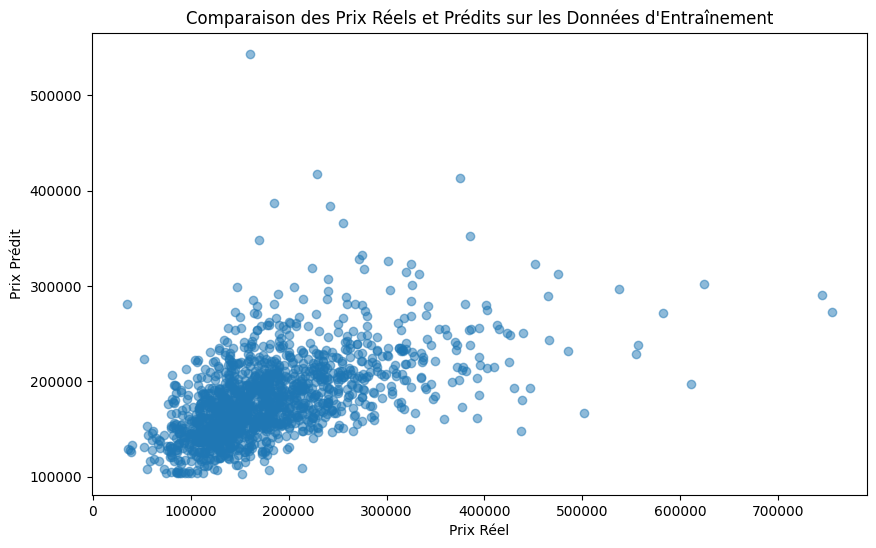

In [265]:

x_train_encoded_outside = x_train_encoded[['MSSubClass',  'LotFrontage',  'LotArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea']]

# Entraîner le modèle avec les données d'entraînement
model = LinearRegression()
model.fit(x_train_encoded_outside, y_train)

# Faire des prédictions avec le modèle sur les données d'entraînement
y_train_pred = model.predict(x_train_encoded_outside)

# Affichage des résultats
print("RMSE (Racine de l'erreur quadratique) sur les données d'entraînement :", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("R² Score sur les données d'entraînement :", r2_score(y_train, y_train_pred))

# Affichage du scatter plot pour visualiser la performance sur les données d'entraînement
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred, alpha=0.5)
plt.xlabel("Prix Réel")
plt.ylabel("Prix Prédit")
plt.title("Comparaison des Prix Réels et Prédits sur les Données d'Entraînement")
plt.show()




RMSE (Racine de l'erreur quadratique) sur les données d'entraînement : 64734.56144913311
R² Score sur les données d'entraînement : 0.3355471823256784


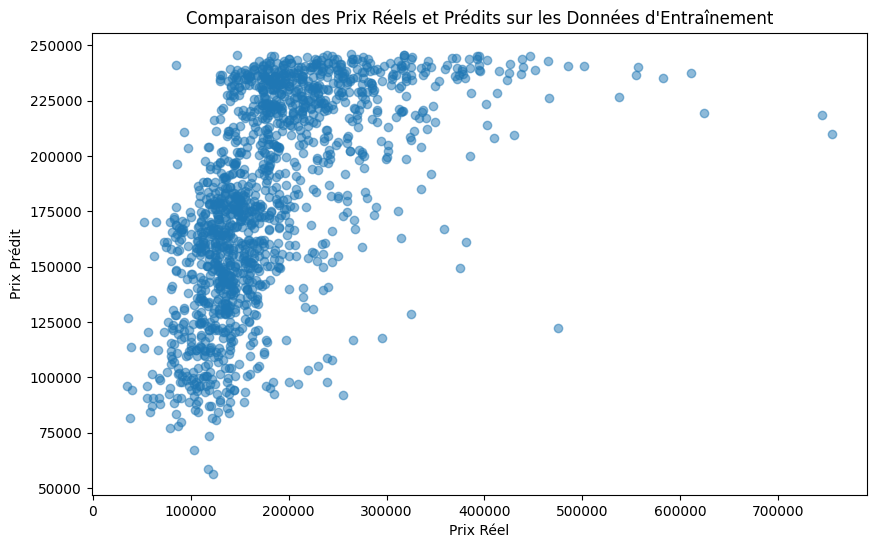

In [266]:

x_train_encoded_inside = x_train_encoded[['MiscVal', 'MoSold', 'YrSold', 'YearBuilt', 'YearRemodAdd']]

# Entraîner le modèle avec les données d'entraînement
model = LinearRegression()
model.fit(x_train_encoded_inside, y_train)

# Faire des prédictions avec le modèle sur les données d'entraînement
y_train_pred = model.predict(x_train_encoded_inside)

# Affichage des résultats
print("RMSE (Racine de l'erreur quadratique) sur les données d'entraînement :", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("R² Score sur les données d'entraînement :", r2_score(y_train, y_train_pred))

# Affichage du scatter plot pour visualiser la performance sur les données d'entraînement
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred, alpha=0.5)
plt.xlabel("Prix Réel")
plt.ylabel("Prix Prédit")
plt.title("Comparaison des Prix Réels et Prédits sur les Données d'Entraînement")
plt.show()




In [267]:
# Charger le fichier de test
x_test = pd.read_csv("data/test.csv")  # Remplace par ton fichier de test

# Identifier les colonnes catégorielles
cat_columns = x_test.select_dtypes(include=['object']).columns

# Appliquer get_dummies() sur les colonnes catégorielles
x_test = pd.get_dummies(x_train, columns=cat_columns, drop_first=True)

# Calculer le pourcentage de valeurs manquantes pour chaque colonne
missing_percentage = x_test.isnull().mean() * 100

# Sélectionner les colonnes avec plus de 65% de valeurs manquantes et les supprimer
columns_to_drop = missing_percentage[missing_percentage > 65].index
x_test = x_test.drop(columns=columns_to_drop)

# Sélectionner les colonnes avec moins de 65% de valeurs manquantes et les remplir avec la médiane
columns_to_fill = missing_percentage[missing_percentage <= 65].index
x_test[columns_to_fill] = x_test[columns_to_fill].fillna(x_test[columns_to_fill].median())


In [268]:

# Faire des prédictions sur le fichier de test
y_test_pred = trained_model.predict(x_test)

# Créer un DataFrame pour les résultats de test (Id et prédictions)
resultats_test = pd.DataFrame({'Id': x_test['Id'], 'SalePrice': y_test_pred})

# Sauvegarder les résultats dans un fichier CSV
resultats_test.to_csv('submission.csv', index=False)


